In [78]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.stats import chi2_contingency
import seaborn as sns

In [79]:
file= Path("sources/Amazon Customer Behavior Survey.csv")
file_df= pd.read_csv(file)
file_df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [81]:
Weekly_trends = file_df.loc[:, ['Timestamp', 'Gender']]

Weekly_trends.head(10)

,Timestamp,Gender
0,2023/06/04 1:28:19 PM GMT+5:30,Female
1,2023/06/04 2:30:44 PM GMT+5:30,Female
2,2023/06/04 5:04:56 PM GMT+5:30,Prefer not to say
3,2023/06/04 5:13:00 PM GMT+5:30,Female
4,2023/06/04 5:28:06 PM GMT+5:30,Female
5,2023/06/04 6:01:59 PM GMT+5:30,Female
6,2023/06/04 6:31:41 PM GMT+5:30,Female
7,2023/06/04 7:13:12 PM GMT+5:30,Female
8,2023/06/04 7:23:21 PM GMT+5:30,Female
9,2023/06/04 7:33:12 PM GMT+5:30,Female


In [100]:
unique_timestamp = file_df['Timestamp'].unique()
print("Unique values in Timestamp column:")
print(unique_timestamp)

Unique values in Timestamp column:
<DatetimeArray>
['2023-06-04 13:28:19-05:30', '2023-06-04 14:30:44-05:30',
 '2023-06-04 17:04:56-05:30', '2023-06-04 17:13:00-05:30',
 '2023-06-04 17:28:06-05:30', '2023-06-04 18:01:59-05:30',
 '2023-06-04 18:31:41-05:30', '2023-06-04 19:13:12-05:30',
 '2023-06-04 19:23:21-05:30', '2023-06-04 19:33:12-05:30',
 ...
 '2023-06-12 15:56:57-05:30', '2023-06-12 15:57:52-05:30',
 '2023-06-12 15:59:10-05:30', '2023-06-12 15:59:59-05:30',
 '2023-06-12 16:00:56-05:30', '2023-06-12 16:02:02-05:30',
 '2023-06-12 16:02:53-05:30', '2023-06-12 16:03:59-05:30',
 '2023-06-12 21:57:20-05:30', '2023-06-16 09:16:05-05:30']
Length: 601, dtype: datetime64[ns, pytz.FixedOffset(-330)]


In [101]:
file_df['Timestamp'] = pd.to_datetime(file_df['Timestamp'])

# Extract date, time, and timezone

file_df['Date'] = file_df['Timestamp'].dt.strftime('%Y-%m-%d')
file_df['Time'] = file_df['Timestamp'].dt.strftime('%H:%M:%S')
file_df['Timezone'] = 'GMT +05:30'
file_df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time,Timezone,Day_Name
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04,13:28:19,GMT +05:30,Sunday
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04,14:30:44,GMT +05:30,Sunday
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04,17:04:56,GMT +05:30,Sunday
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04,17:13:00,GMT +05:30,Sunday
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04,17:28:06,GMT +05:30,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023-06-12 16:02:02-05:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,3,Sometimes,3,4,Competitive prices,Customer service responsiveness,2023-06-12,16:02:02,GMT +05:30,Monday
598,2023-06-12 16:02:53-05:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,3,Sometimes,3,3,Product recommendations,Reducing packaging waste,2023-06-12,16:02:53,GMT +05:30,Monday
599,2023-06-12 16:03:59-05:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,3,Sometimes,2,3,Wide product selection,Product quality and accuracy,2023-06-12,16:03:59,GMT +05:30,Monday
600,2023-06-12 21:57:20-05:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,2,Yes,2,2,Wide product selection,Product quality and accuracy,2023-06-12,21:57:20,GMT +05:30,Monday


In [102]:
file_df['Date'] = pd.to_datetime(file_df['Date'])
# Extract the day name and create a new column
file_df['Day_Name'] = file_df['Date'].dt.day_name()
# Display the DataFrame with the new 'Day_Name' column
file_df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time,Timezone,Day_Name
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04,13:28:19,GMT +05:30,Sunday
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04,14:30:44,GMT +05:30,Sunday
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04,17:04:56,GMT +05:30,Sunday
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04,17:13:00,GMT +05:30,Sunday
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04,17:28:06,GMT +05:30,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023-06-12 16:02:02-05:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,3,Sometimes,3,4,Competitive prices,Customer service responsiveness,2023-06-12,16:02:02,GMT +05:30,Monday
598,2023-06-12 16:02:53-05:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,3,Sometimes,3,3,Product recommendations,Reducing packaging waste,2023-06-12,16:02:53,GMT +05:30,Monday
599,2023-06-12 16:03:59-05:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,3,Sometimes,2,3,Wide product selection,Product quality and accuracy,2023-06-12,16:03:59,GMT +05:30,Monday
600,2023-06-12 21:57:20-05:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,2,Yes,2,2,Wide product selection,Product quality and accuracy,2023-06-12,21:57:20,GMT +05:30,Monday


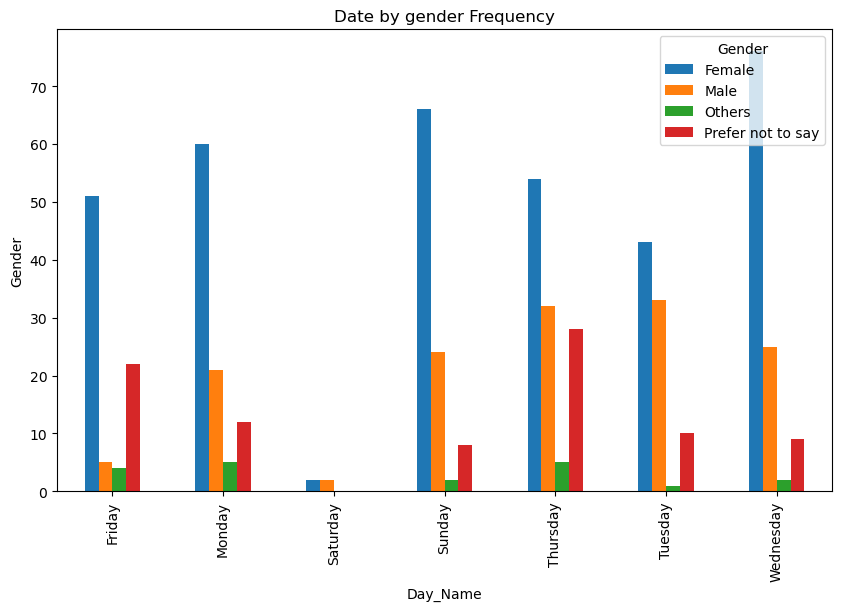

In [103]:
grouped = file_df.groupby(['Day_Name', 'Gender']).size().unstack()
grouped.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Date by gender Frequency')
plt.xlabel('Day_Name')
plt.ylabel('Gender')
plt.show()

ValueError: x and y must be the same size

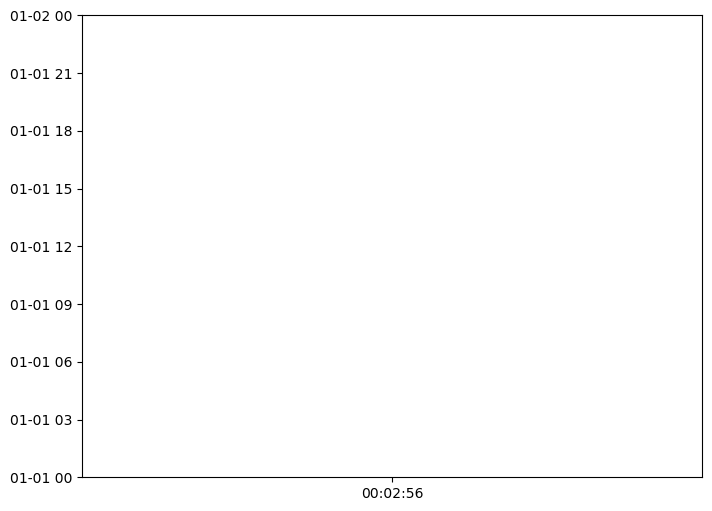

In [111]:
grouped = file_df.groupby(['Date', 'Time']).size().unstack()

plt.figure(figsize=(8, 6))

# Use the 'Time' and 'Day_Name' columns from your DataFrame
x = grouped.columns
y = grouped.index

# Create the scatter plot
plt.scatter(x, y, c='blue', marker='o', label='Date and Time Shopping Frequency')

plt.xlabel('Time')
plt.ylabel('Date')
plt.title('Shopping Frequency by Date and Time')

# Show a legend
plt.legend()

# Display the plot
plt.show()

In [93]:
grouped

Time,00:02:56,00:05:20,00:36:02,00:37:54,00:39:14,00:57:05,00:58:28,02:56:10,03:08:03,03:23:21,...,23:25:48,23:26:21,23:26:54,23:27:25,23:27:53,23:27:55,23:28:26,23:28:31,23:38:30,23:57:10
Day_Name,,,,,,,,,,,,,,,,,,,,,
Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monday,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
